In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
! pwd


/home/student/NANDU DS


In [3]:
#coubt the number of images 0 - cancer 1 - healthy
number_of_images={}
BASE_DIR = os.path.join(os.getcwd(),"BRAIN tumor","Brain Tumor")
for dir in os.listdir(BASE_DIR):
    number_of_images[dir]=len(os.listdir(os.path.join(BASE_DIR, dir)))

number_of_images.items() 

dict_items([('Brain Tumor', 829)])

In [4]:
len(os.listdir(BASE_DIR))

1

#we will split the data
* 70% for training
* 15% for validation
* 15% for testing

In [5]:
# we will create a train folder

if not os.path.exists("./train"):
    os.mkdir("./train")
    
    for dir in os.listdir(BASE_DIR):
        os.makedirs("./train"+dir)
        
        for img in np.random.choice(a=os.listdir(os.path.join(BASE_DIR, dir)),  
                                    size=(math.floor(70/100*number_of_images[dir])-5), replace=False):
            O = os.path.join(BASE_DIR,dir,img)
            D = os.path.join(".\train",dir)
            os.remove(O)
else:
    print("The folder exist")

The folder exist


In [6]:
def dataFolder(p, split):
    
    #we create training folder
    
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)
    
    for dir in os.listdir(BASE_DIR):
        os.makedirs("./"+p+"/"+dir)
        
        for img in np.random.choice(a=os.listdir(os.path.join(BASE_DIR, dir)),  
                                    size=(math.floor(split*number_of_images[dir])-5), replace=False):
            O = os.path.join(BASE_DIR,dir,img)
            D = os.path.join("./"+p,dir)
            shutil.copy(O,D)
            os.remove(O)
    else:
        print(f"{p}The folder exist")

In [7]:
dataFolder("train", 0.7)

FileExistsError: [Errno 17] File exists: './train/Brain Tumor'

In [ ]:
dataFolder("val", 0.15)

In [ ]:
dataFolder("test", 0.15)

In [ ]:
for dir in os.listdir(BASE_DIR):
    number_of_images[dir]=len(os.listdir(os.path.join(BASE_DIR, dir)))

number_of_images.items()

# model building 

In [11]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import keras

2023-01-19 15:11:25.570776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 15:11:25.673923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 15:11:25.673935: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 15:11:25.691408: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-19 15:11:26.153143: W tensorflow/stream_executor/platform/de

In [12]:
# CNN model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

2023-01-19 15:11:28.052149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-19 15:11:28.052167: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-19 15:11:28.052180: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tech-ThinkCentre-M80t): /proc/driver/nvidia/version does not exist
2023-01-19 15:11:28.052308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'] )

# #preparing our data using  data Generator

In [27]:
def preprocessingImages1(path):
    '''
    input: path
    OUTPUT: PRE PROCESSSED IMAGES
    '''
    image_data=ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
    image=image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode="binary")
    
    return image


In [28]:
path="/home/student/NANDU DS/train"
train_data=preprocessingImages1(path)

Found 2628 images belonging to 1 classes.


In [29]:
def preprocessingImages2(path):
    '''
    input: path
    OUTPUT: PRE PROCESSSED IMAGES
    '''
    image_data=ImageDataGenerator(rescale=1/255 )
    image=image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode="binary")
    
    return image


In [31]:
path="/home/student/NANDU DS/test/"
test_data=preprocessingImages2(path)

Found 140 images belonging to 1 classes.


In [30]:
path="/home/student/NANDU DS/val/"
val_data=preprocessingImages2(path)

Found 165 images belonging to 1 classes.


In [34]:
# early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping

es=EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1, mode='auto')

#model check point
mc=ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode='auto')

cd=[es,mc]

# MODEL TRAINING

In [35]:
hs=model.fit_generator(generator= train_data, 
                       steps_per_epoch=8, 
                       epochs=30, verbose=1,
                       validation_data=val_data, 
                       validation_steps=16, 
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ./bestmodel.h5
8/8 [==============================] - 13s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
8/8 [==============================] - 13s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/30
8/8 [==============================] - 13s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/30
8/8 [==============================] - 13s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/30
8/8 [==============================] - 14s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/30
8/8 [===

8/8 [==============================] - 12s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 22/30
8/8 [==============================] - 11s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 23/30
8/8 [==============================] - 12s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 24/30
8/8 [==============================] - 12s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 25/30
8/8 [==============================] - 11s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 26/30
8/8 [==============================] - 11s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 27/30
8/8 [==============================] - 11s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 28/30
8/8 [==============================] - 11s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 29/30
8/8 [==============================] - 13s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 30/30
8/8 [==============================] - 14s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
#model graphical interpretation

In [37]:
h=hs.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

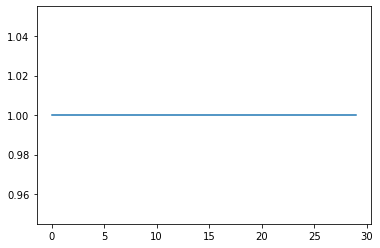

In [41]:
from matplotlib import pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.show()